# importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

# importing dataset (MCDONALD'S)

In [2]:
df=pd.read_csv(r"C:\Users\nagin\Downloads\mcdonalds.csv")

In [3]:
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male
1452,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,-3,30,Every three months,Male


shape of dataset

In [5]:
df.shape

(1453, 15)





# checking for null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [8]:
df.shape

(1453, 15)

In [9]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [10]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

pyschographic segmentation

C:\Users\nagin\AppData\Local\Temp\ipykernel_6212\702863475.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


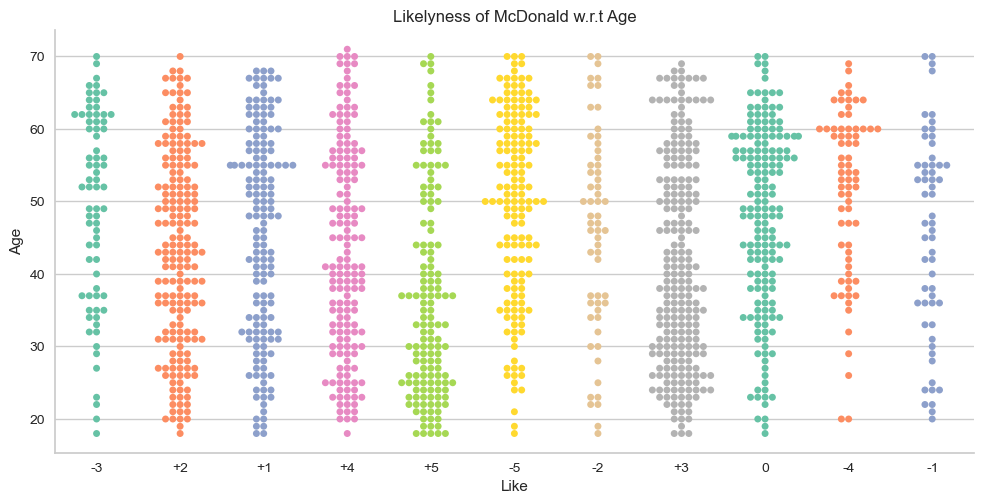

In [11]:
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=5, aspect=2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [12]:
df['Age'].value_counts()

Age
55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: count, dtype: int64

In [13]:
df['Like'].value_counts()

Like
+3    229
+2    187
0     169
+4    160
+1    152
-5    152
+5    143
-3     73
-4     71
-2     59
-1     58
Name: count, dtype: int64

In [14]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [15]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

# univariate analysis

# countplot

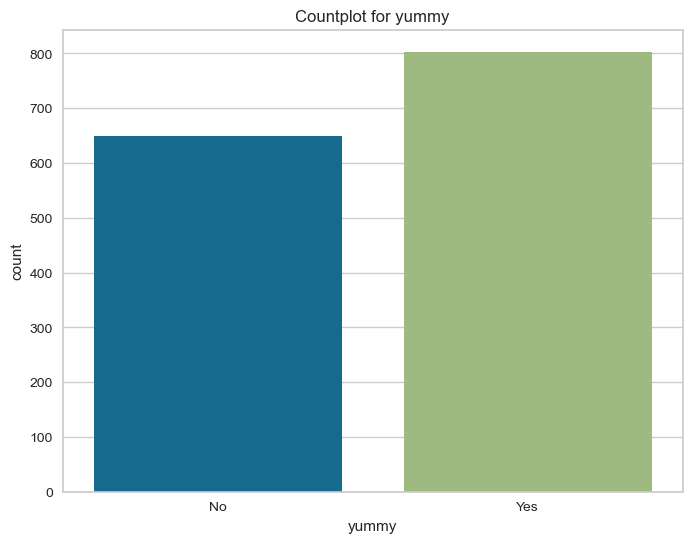

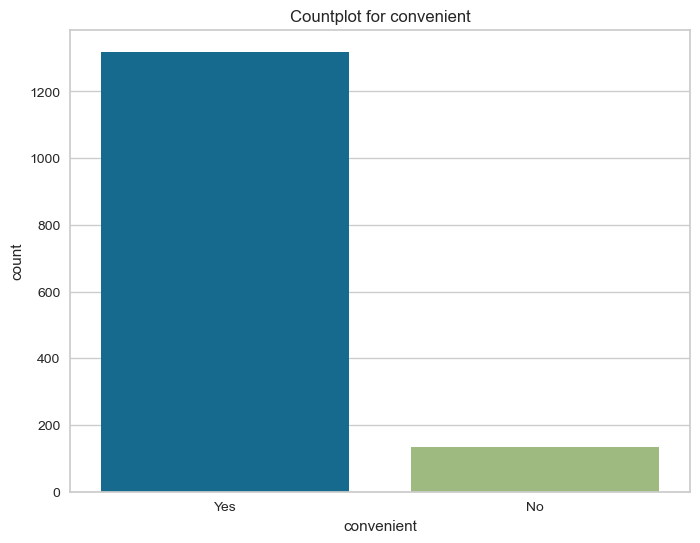

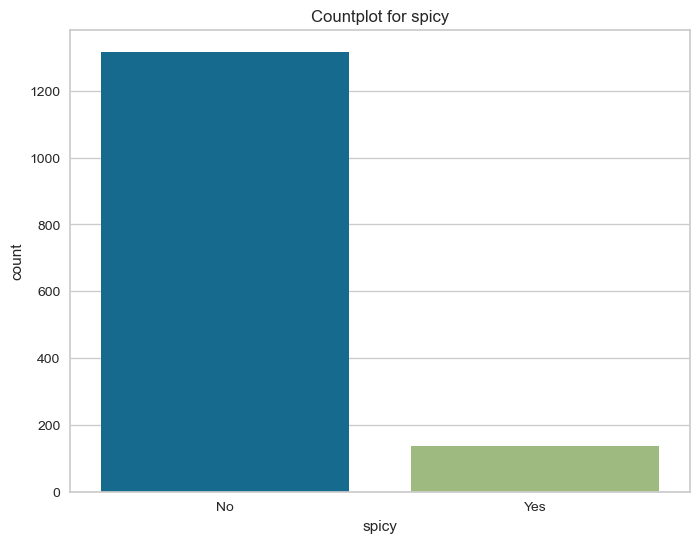

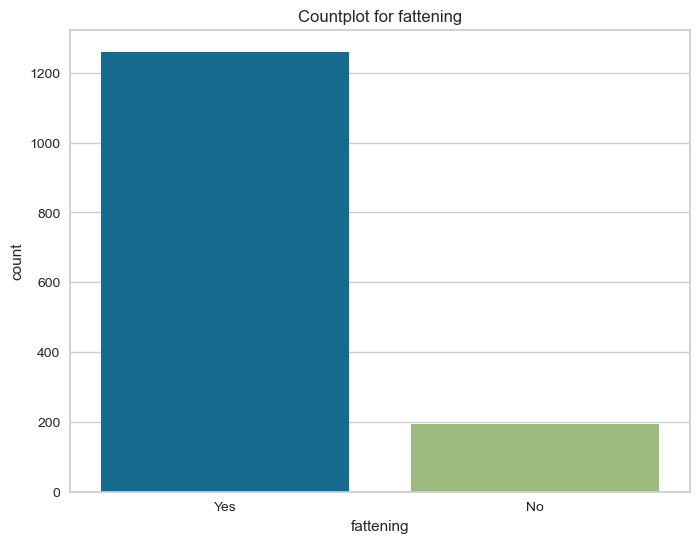

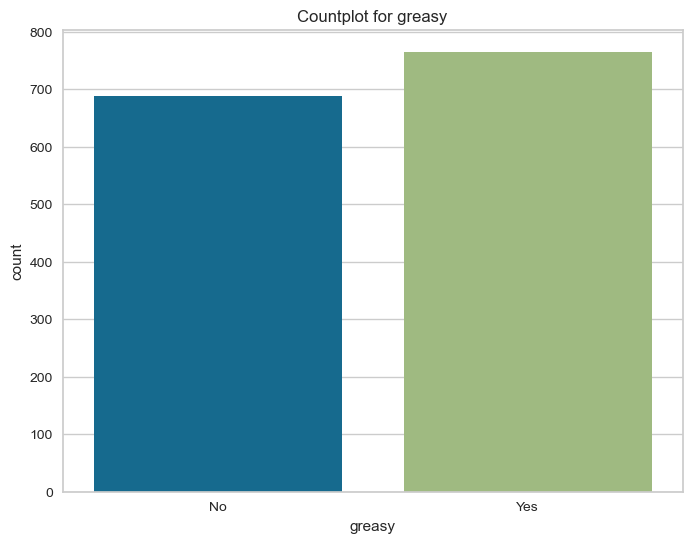

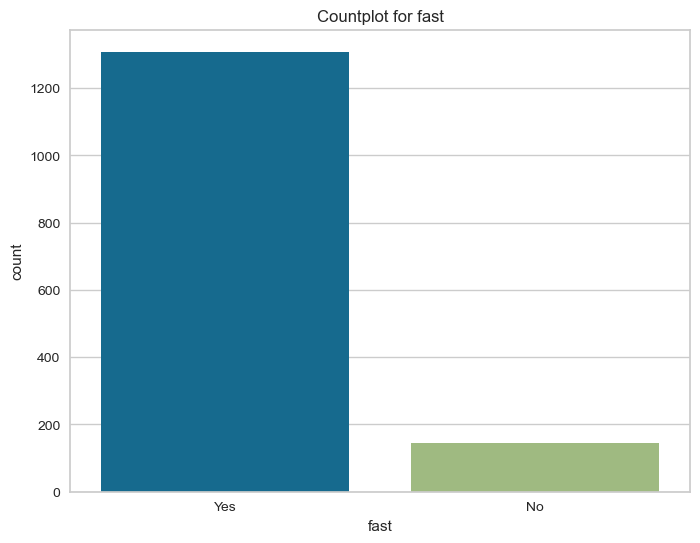

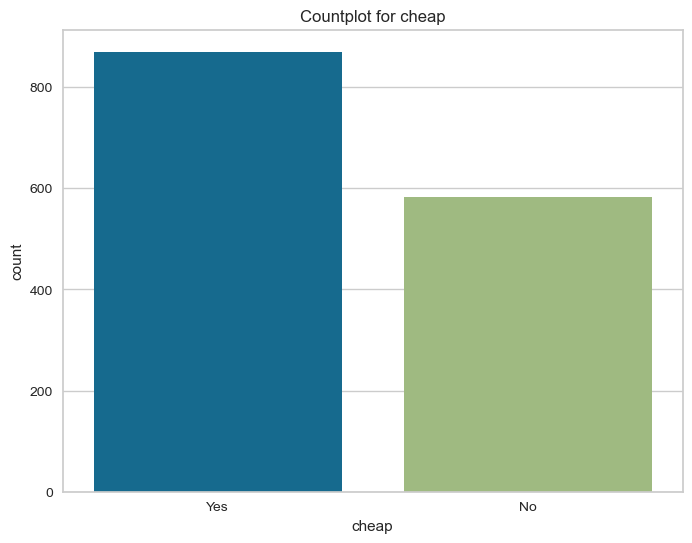

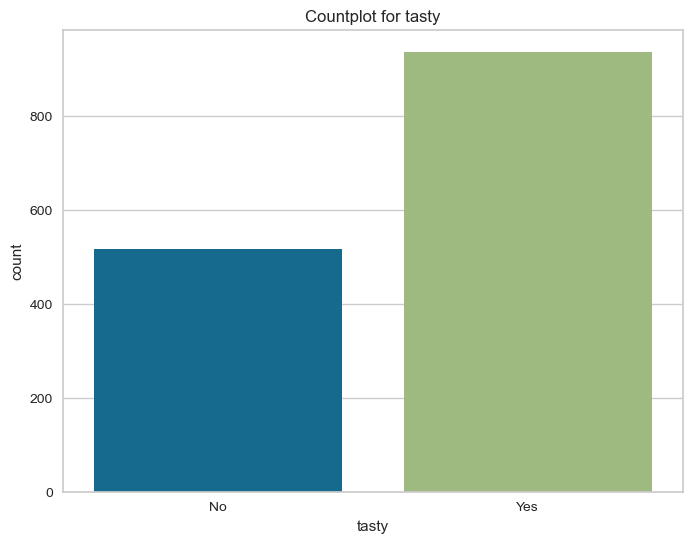

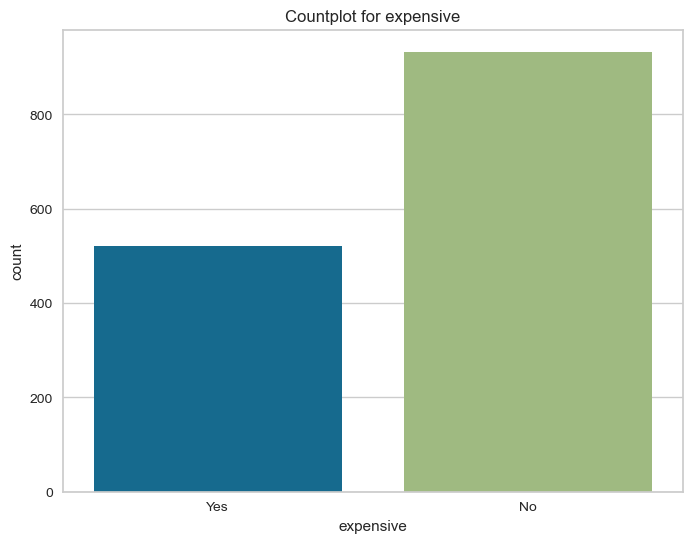

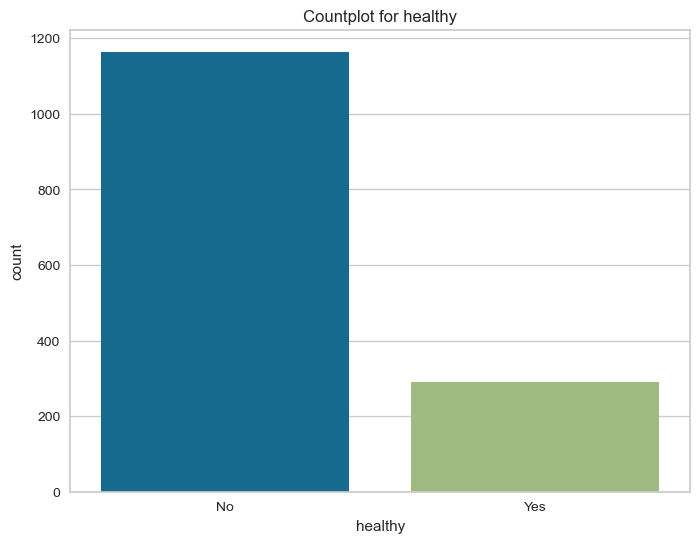

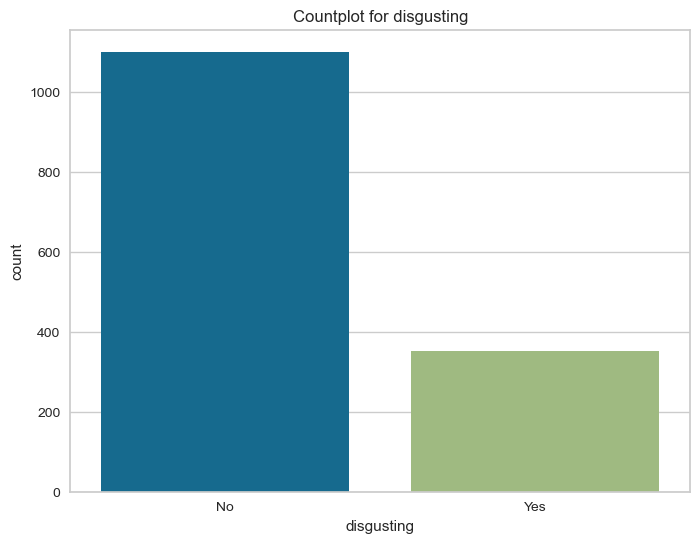

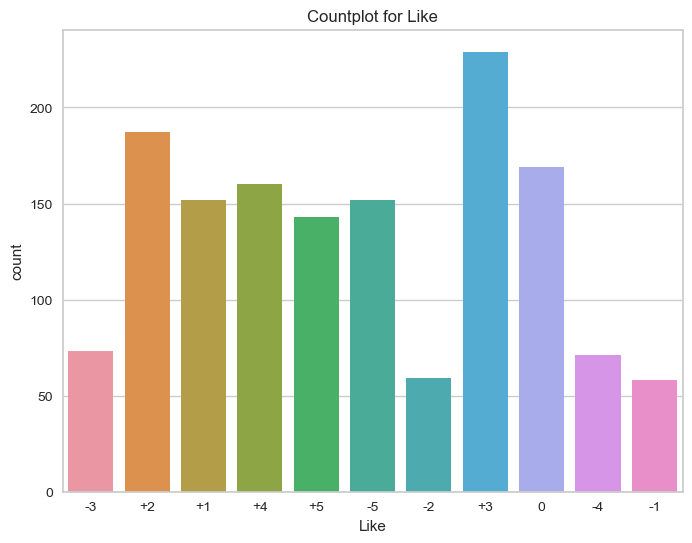

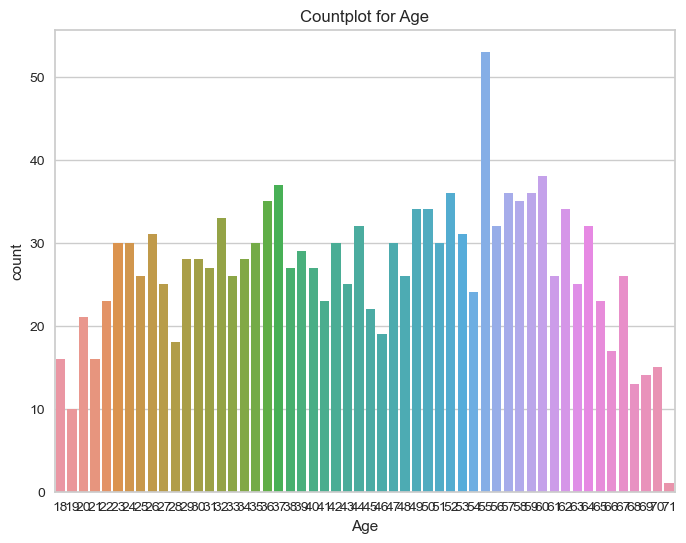

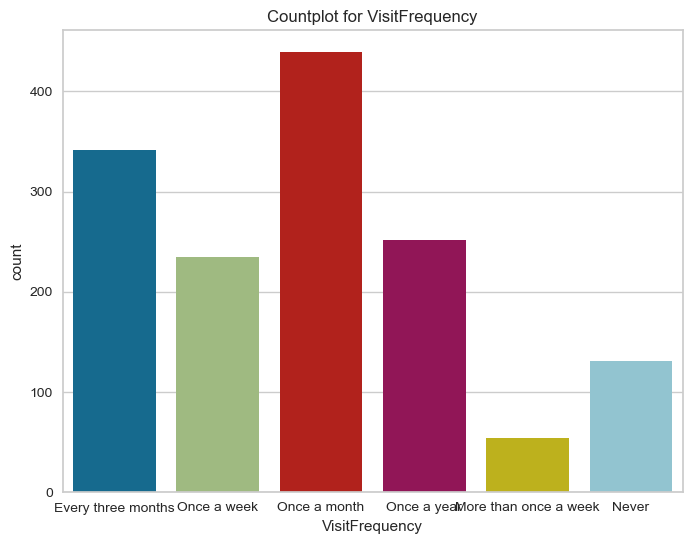

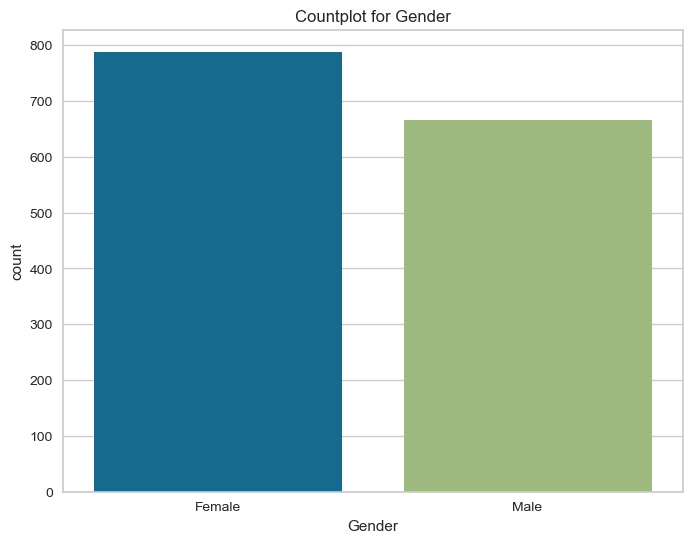

In [16]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column])
    plt.title(f'Countplot for {column}')
    plt.xlabel(column)
    plt.show()

histplot

c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

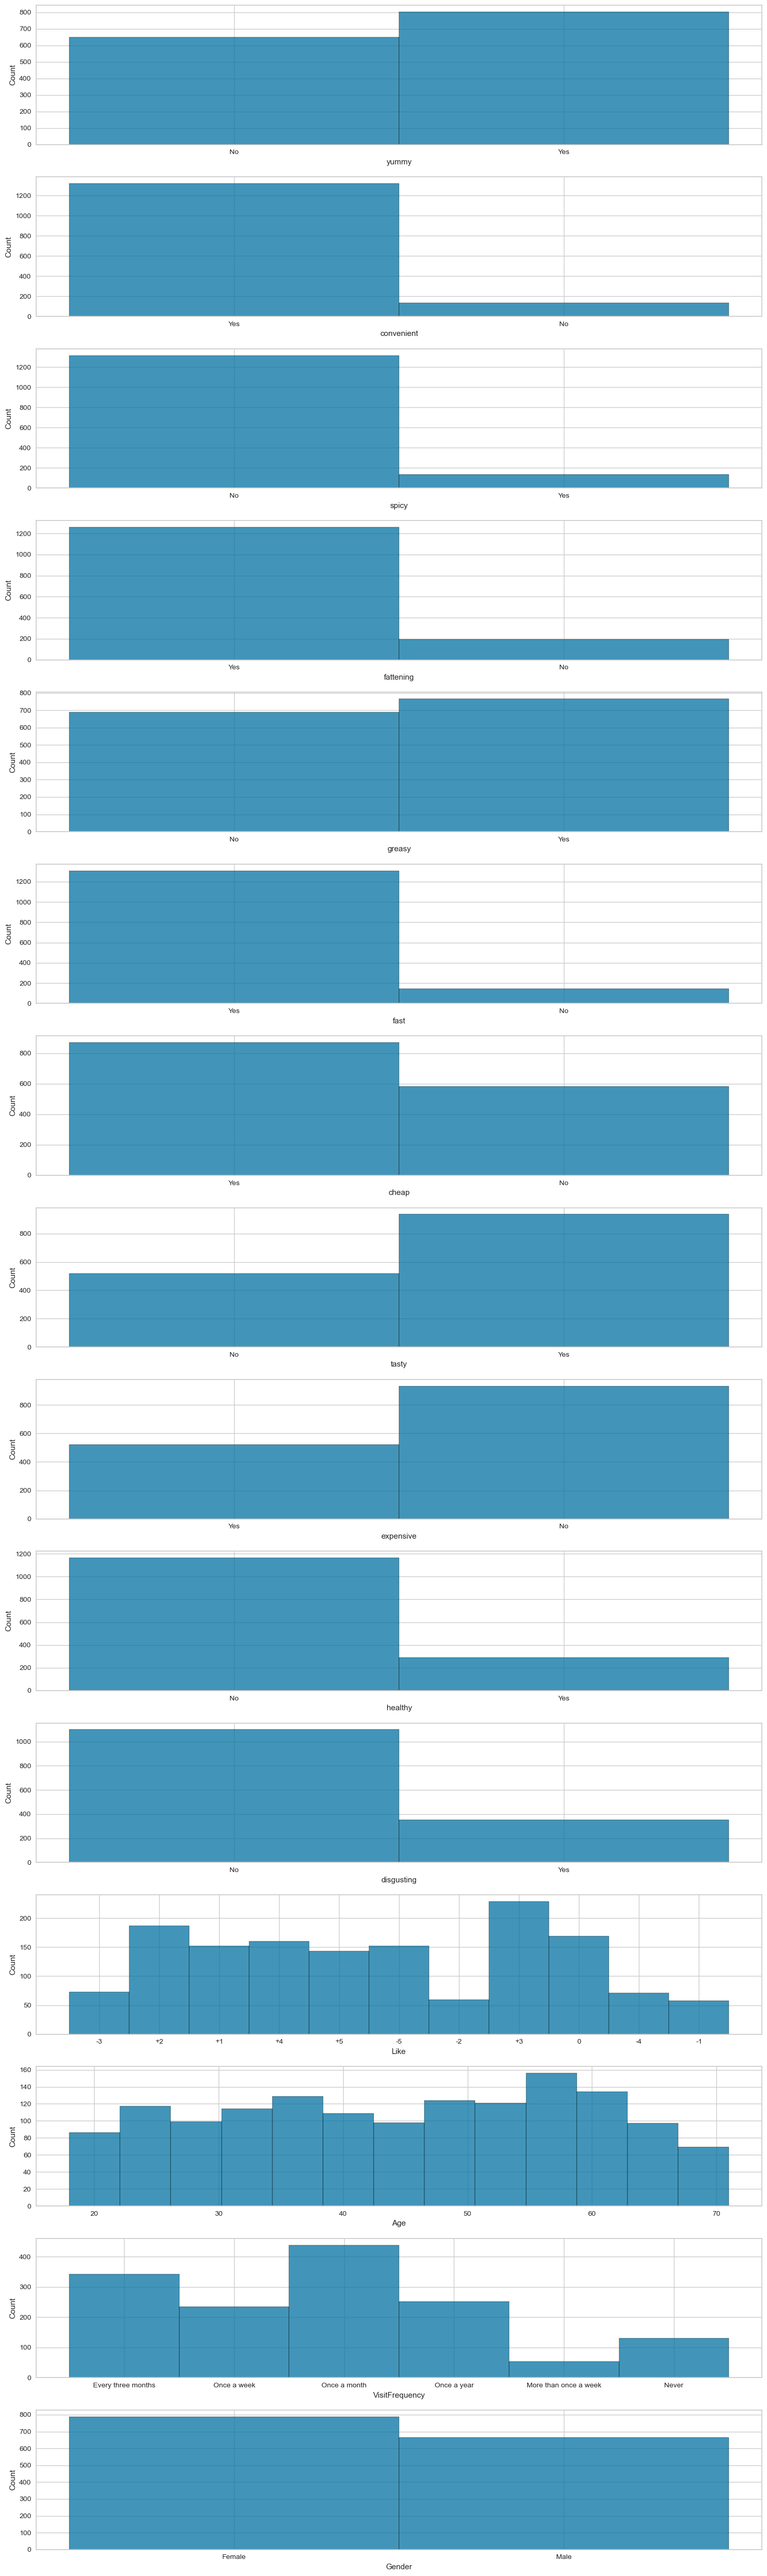

In [17]:
plt.figure(figsize=(15,50))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    sns.histplot(df[col])
    plt.tight_layout()

pie chart

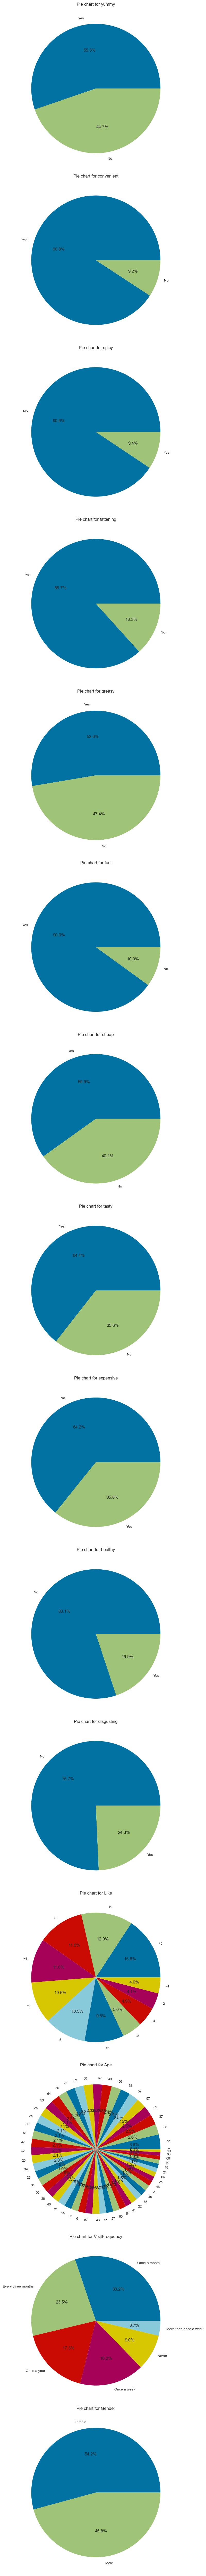

In [18]:
plt.figure(figsize=(100,100))
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    plt.title(f'Pie chart for {col}')
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

# bivariate analysis

# scatter plots

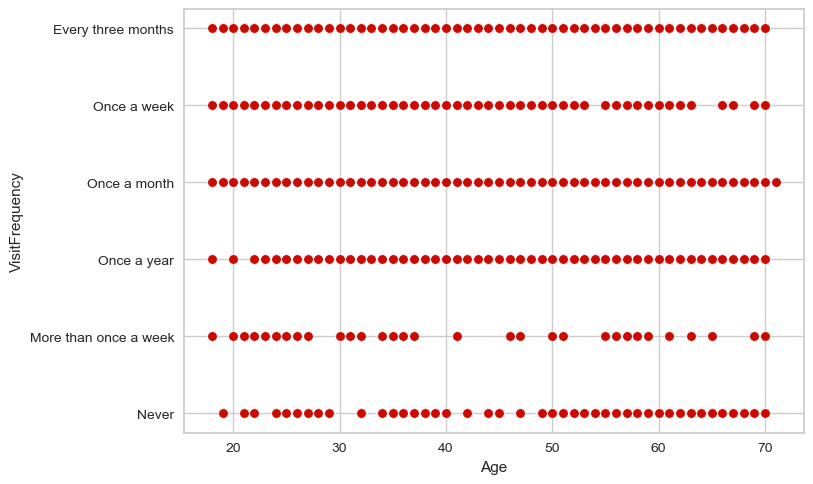

In [19]:
for i,col in enumerate(df.columns):
    sns.scatterplot(x='Age',y='VisitFrequency',data=df)

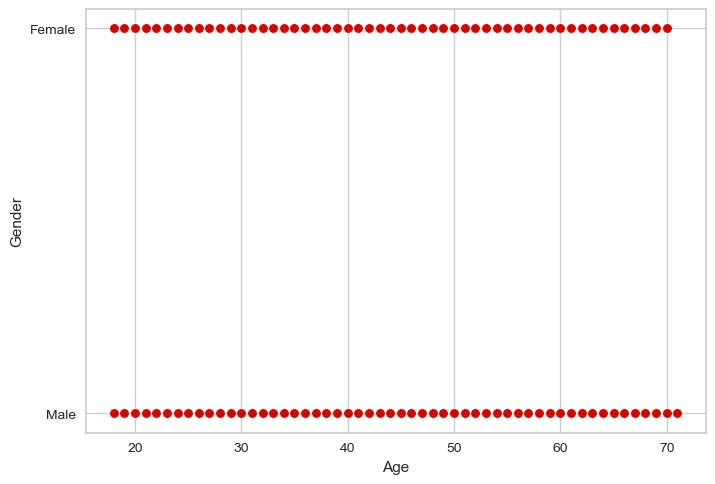

In [20]:
for i,col in enumerate(df.columns):
    sns.scatterplot(x='Age',y='Gender',data=df)

<Axes: xlabel='Like', ylabel='Age'>

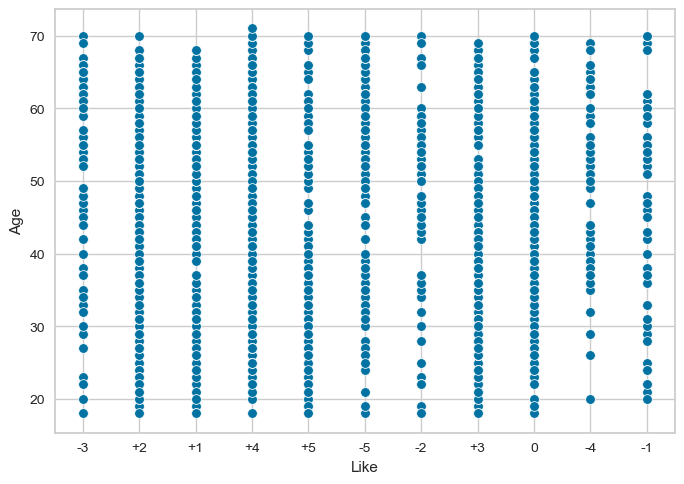

In [21]:
 sns.scatterplot(x='Like',y='Age',data=df)

# descriptive analysis

In [22]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


# changing categorical values to float values

In [23]:
label_encoder = LabelEncoder()
df['yummy'] = label_encoder.fit_transform(df['yummy'])
df['convenient'] = label_encoder.fit_transform(df['convenient'])
df['spicy'] = label_encoder.fit_transform(df['spicy'])
df['fattening'] = label_encoder.fit_transform(df['fattening'])
df['greasy'] = label_encoder.fit_transform(df['greasy'])
df['fast'] = label_encoder.fit_transform(df['spicy'])
df['cheap'] = label_encoder.fit_transform(df['cheap'])
df['tasty'] = label_encoder.fit_transform(df['tasty'])
df['expensive'] = label_encoder.fit_transform(df['expensive'])
df['healthy'] = label_encoder.fit_transform(df['healthy'])
df['disgusting'] = label_encoder.fit_transform(df['disgusting'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['VisitFrequency'] = label_encoder.fit_transform(df['VisitFrequency'])
df['Like'] = label_encoder.fit_transform(df['Like'])

In [24]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,0,1,0,1,0,0,7,61,0,0
1,1,1,0,1,1,0,1,1,1,0,0,1,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,62,0,0
3,1,1,0,1,1,0,1,1,0,0,1,3,69,4,0
4,0,1,0,1,1,0,1,0,0,1,0,1,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,36,4,0
1450,1,1,0,1,0,0,0,1,1,0,0,2,52,3,0
1451,1,1,0,0,0,0,1,1,0,1,0,3,41,0,1


In [25]:
df.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.093599,0.598761,0.644184,0.357880,0.198899,0.242946,4.458362,44.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.291371,0.490318,0.478925,0.479542,0.399309,0.429010,3.407245,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,57.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,71.000000,5.000000,1.000000


boxplot

<Axes: >

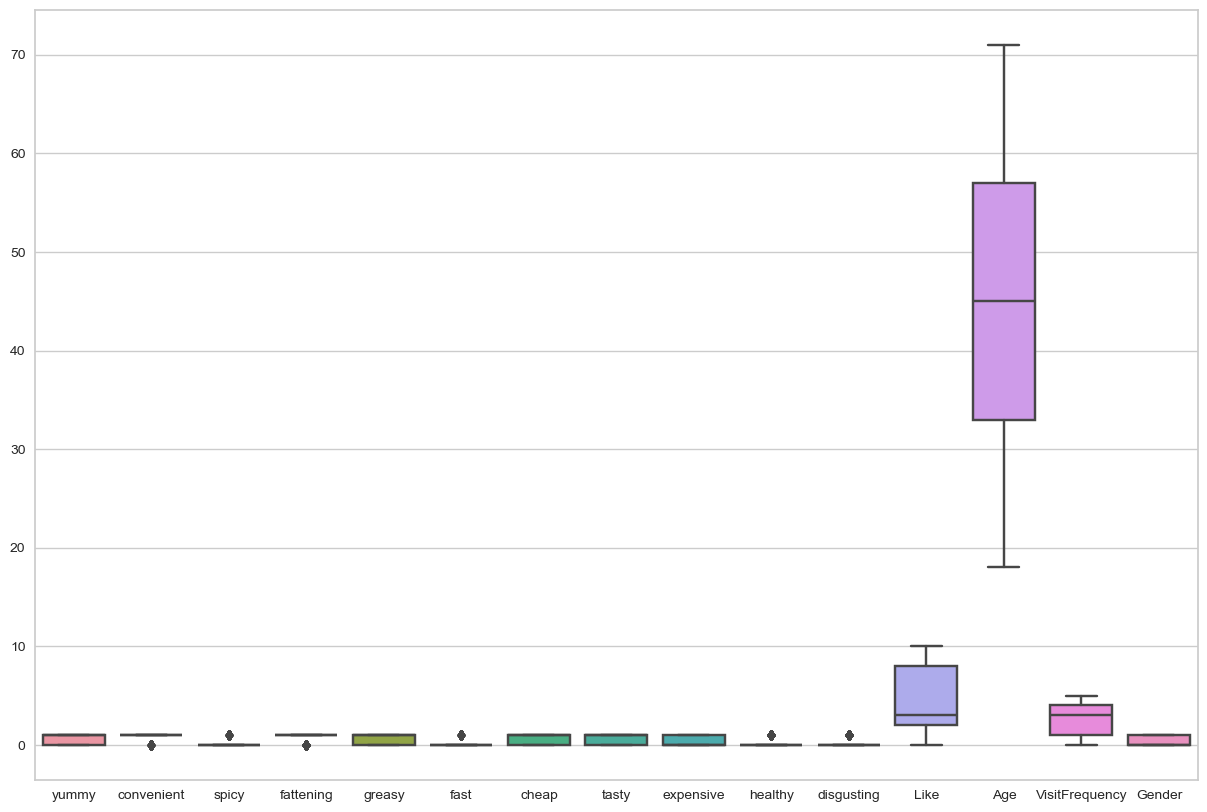

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

found outliers in the dataset

# handling outliers

In [27]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        quant = df[column].quantile(q=[0.75, 0.25])
        Q3 = quant.loc[0.75]
        Q1 = quant.loc[0.25]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound,df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound,df[column])
        

<Axes: >

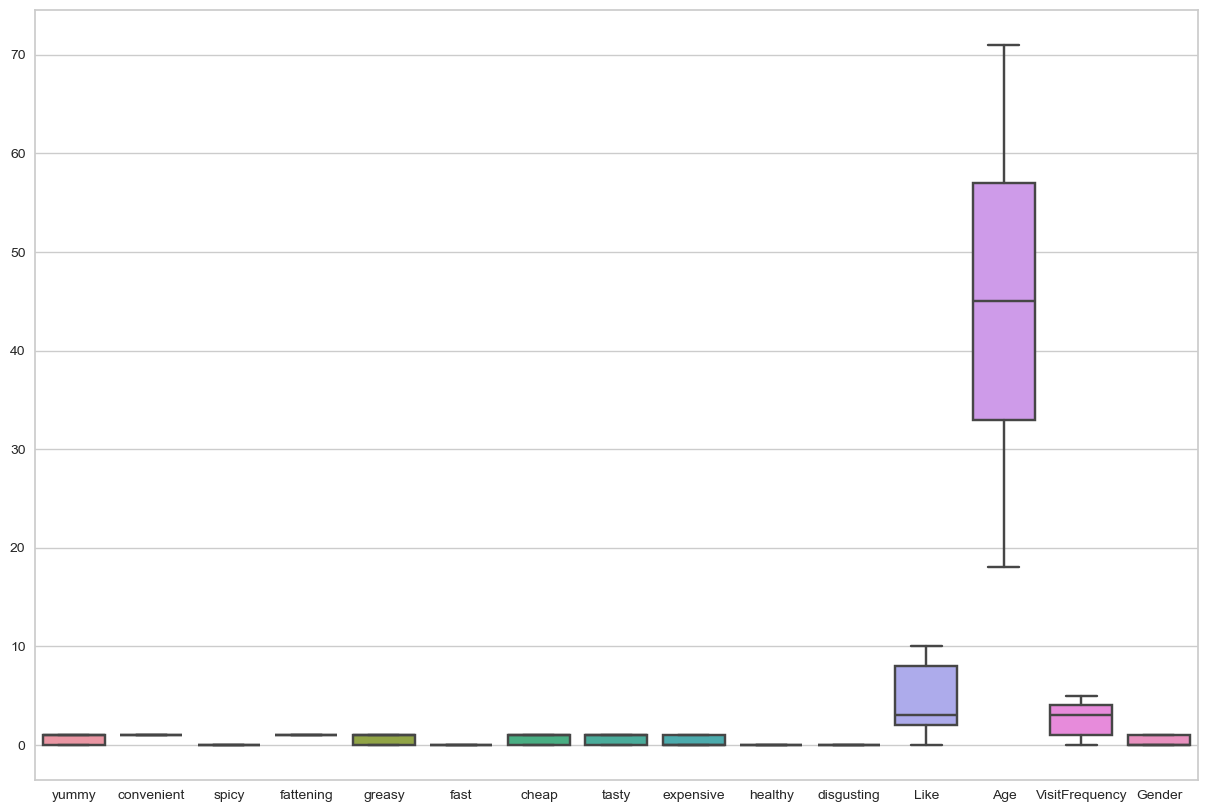

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

# multivariate analysis

pairplot

c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

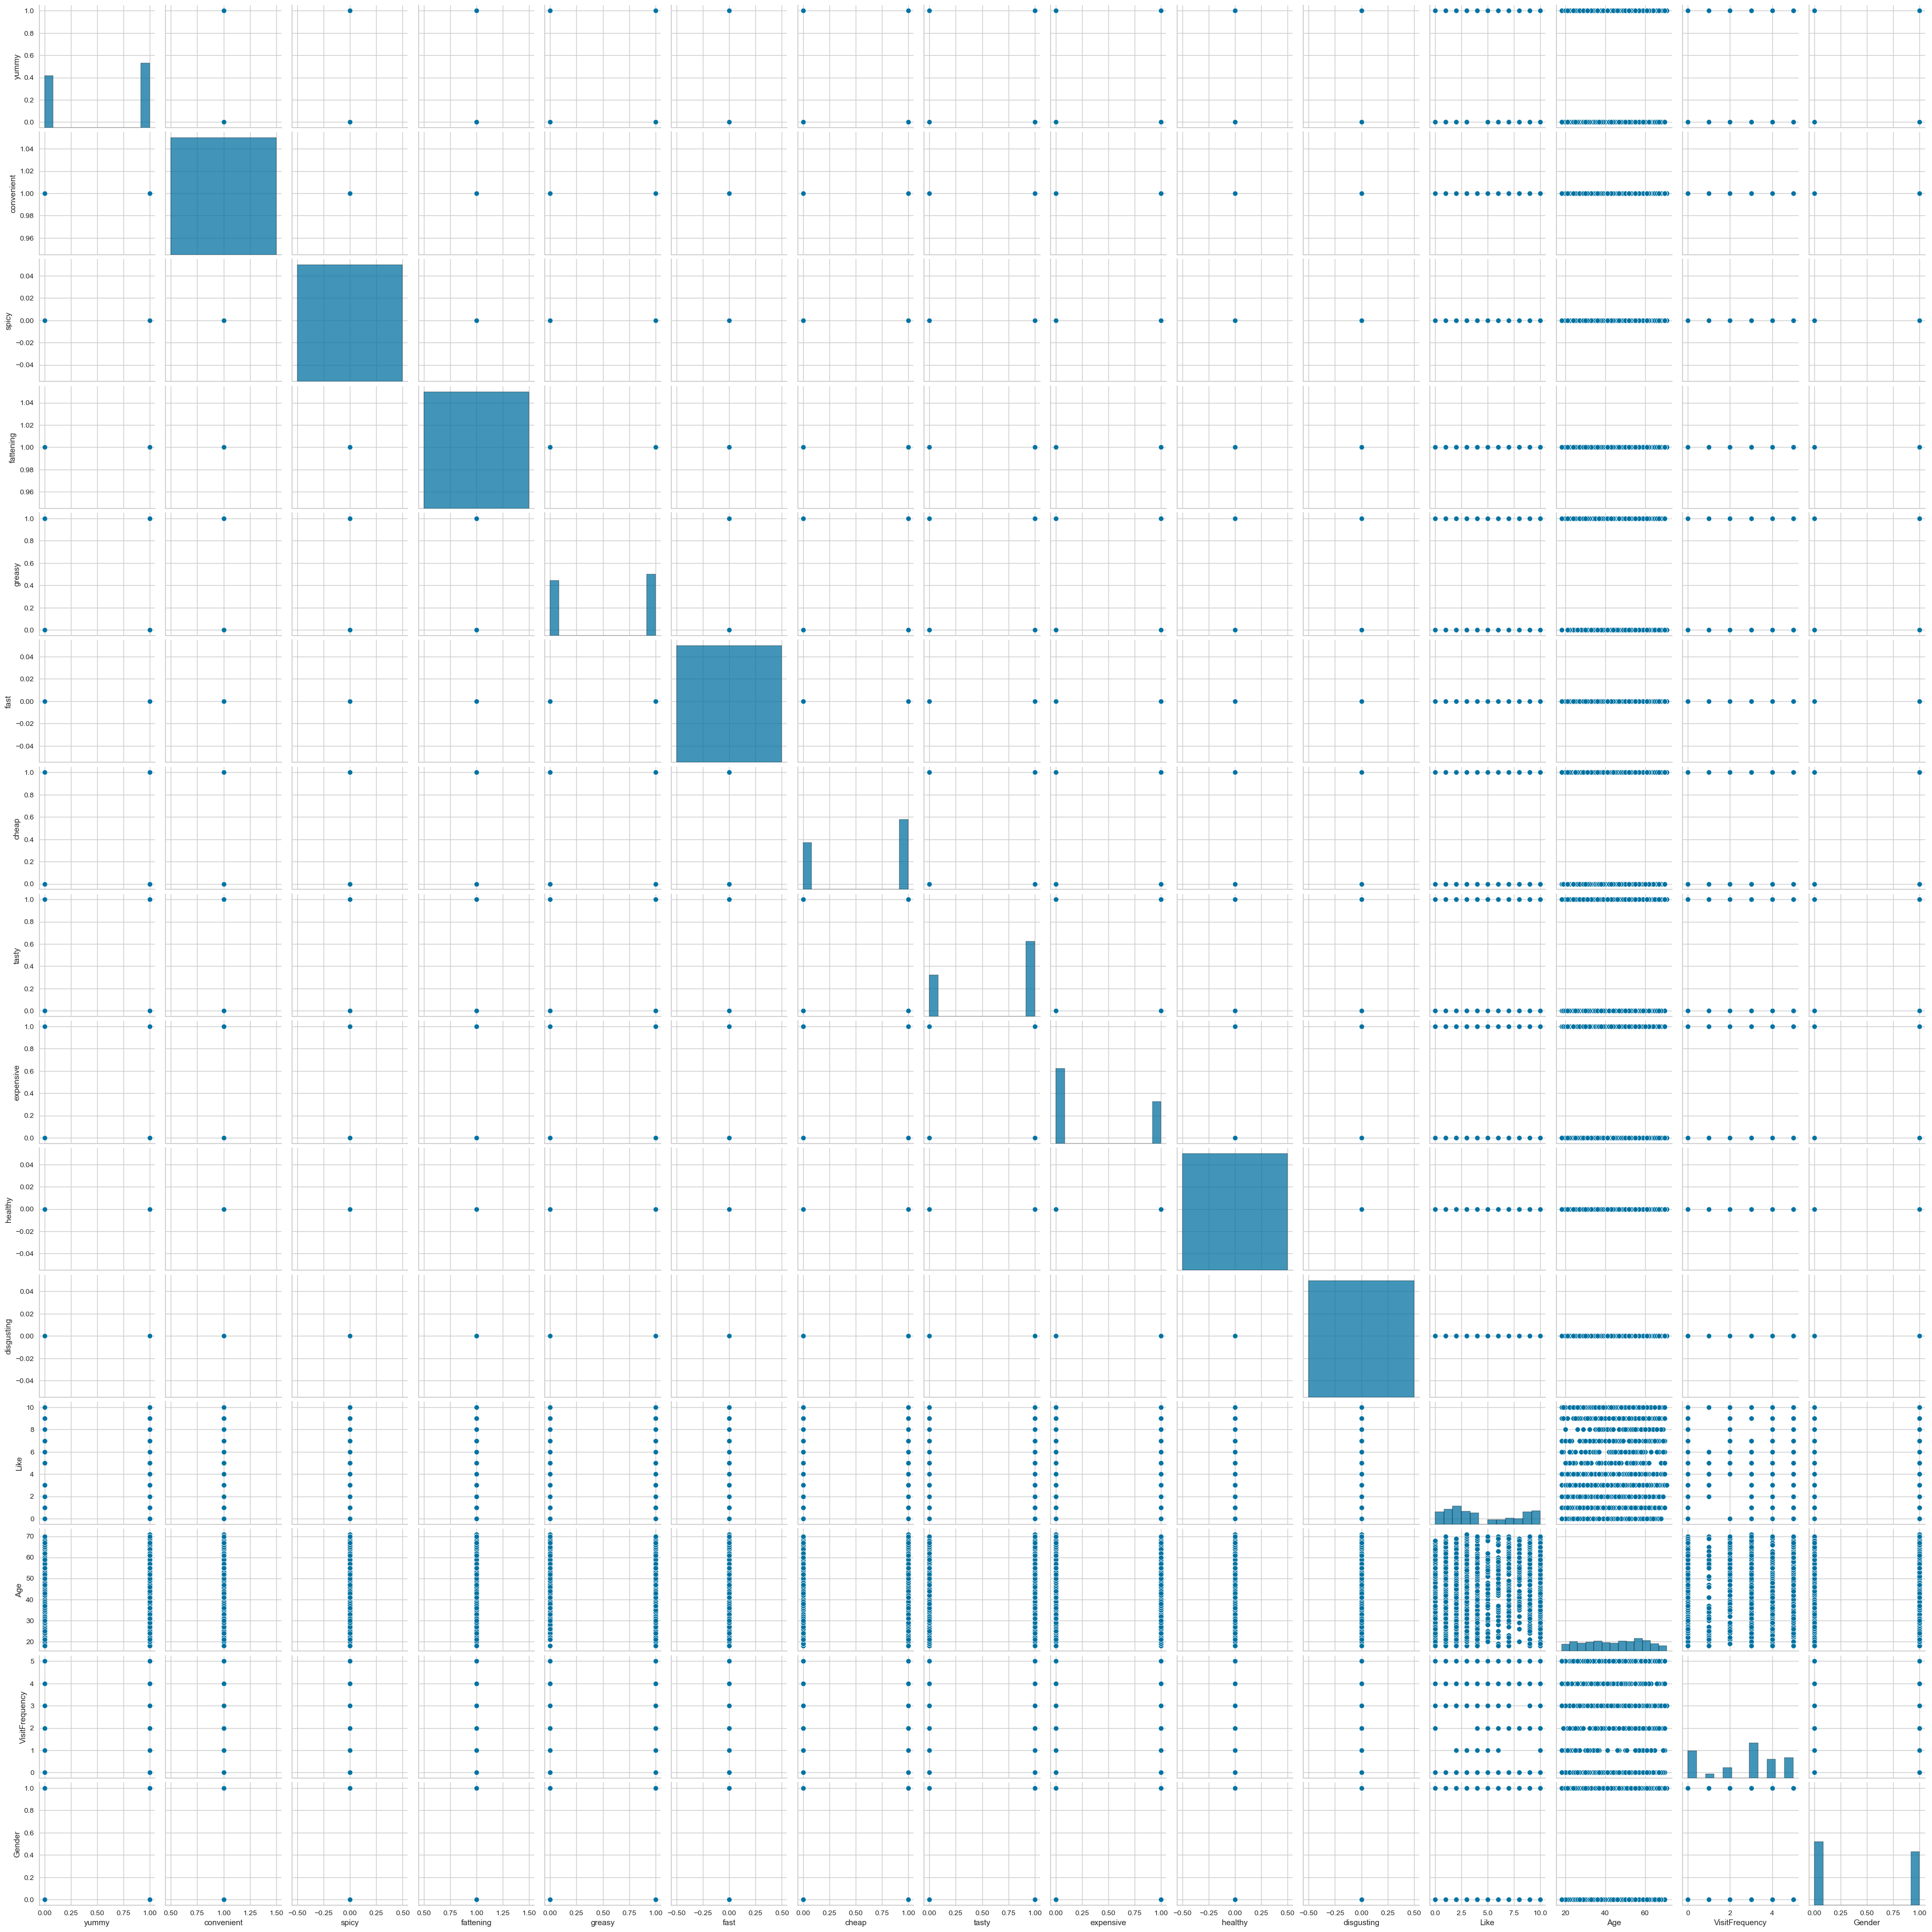

In [29]:
sns.pairplot(df)

In [30]:
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,61.0,0.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,51.0,0.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,62.0,0.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,69.0,4.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,49.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,47.0,5.0,1.0
1449,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,36.0,4.0,0.0
1450,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,52.0,3.0,0.0
1451,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,41.0,0.0,1.0


distplot

C:\Users\nagin\AppData\Local\Temp\ipykernel_6212\3288507218.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
c:\Users\nagin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distribution of Age'}, xlabel='Age', ylabel='Density'>

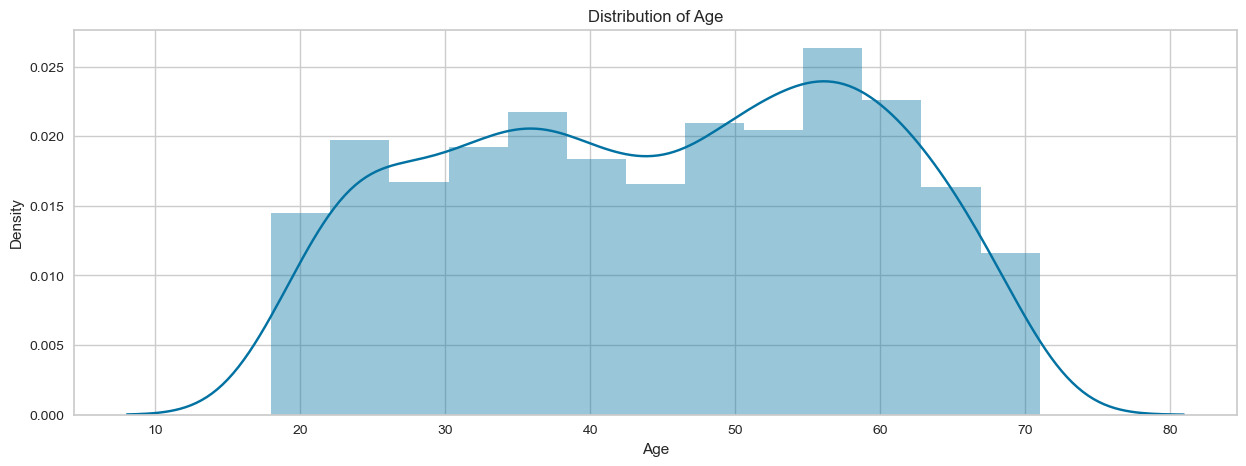

In [31]:
plt.figure(figsize=(15,5))
plt.title("Distribution of Age")
sns.distplot(df['Age'])

In [32]:
df = df.drop(columns=['Like', 'VisitFrequency'])

In [33]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,61.0,0.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,51.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,69.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,47.0,1.0
1449,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,36.0,0.0
1450,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,52.0,0.0
1451,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,41.0,1.0


# model building

kmeans clustering

c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

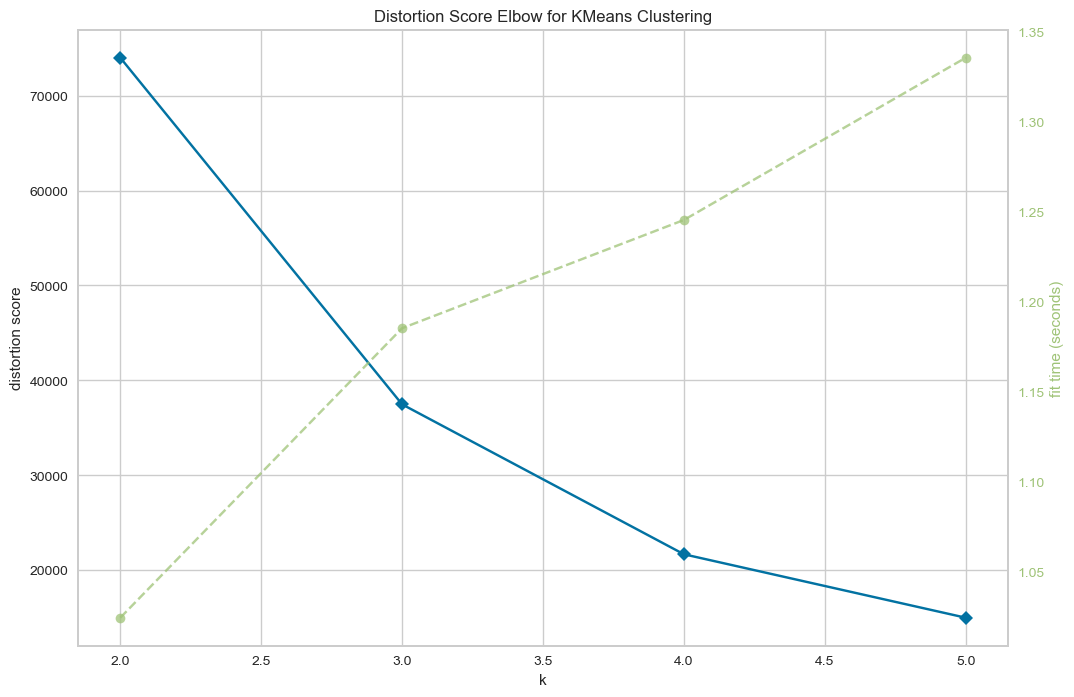

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
fig = plt.figure(figsize=(12,8))
df.head()
X = df[["yummy", "convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting","Age","Gender"]]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))
visualizer.fit(X)
visualizer.poof()

In [35]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

In [36]:
y_kmeans= kmeans.fit_predict(X)

df['cluster'] = pd.DataFrame(y_kmeans)

df.head()

c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,cluster
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,61.0,0.0,2
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,51.0,0.0,0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0,0.0,2
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,69.0,0.0,2
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,0


In [37]:
x = df.values
x

array([[ 0.,  1.,  0., ..., 61.,  0.,  2.],
       [ 1.,  1.,  0., ..., 51.,  0.,  0.],
       [ 0.,  1.,  0., ..., 62.,  0.,  2.],
       ...,
       [ 1.,  1.,  0., ..., 52.,  0.,  0.],
       [ 1.,  1.,  0., ..., 41.,  1.,  1.],
       [ 0.,  1.,  0., ..., 30.,  1.,  3.]])

In [38]:
scaler = StandardScaler()
df[['yummy', 'convenient', 'spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Age','Gender']] = scaler.fit_transform(df[['yummy', 'convenient', 'spicy','fattening','greasy','fast','cheap','tasty','expensive','healthy','disgusting','Age','Gender']])

In [39]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,cluster
0,-1.111479,0.0,0.0,0.0,-1.054476,0.0,0.818605,-1.345528,1.339489,0.0,0.0,1.153258,-0.918645,2
1,0.899702,0.0,0.0,0.0,0.948339,0.0,0.818605,0.743203,1.339489,0.0,0.0,0.449839,-0.918645,0
2,-1.111479,0.0,0.0,0.0,0.948339,0.0,-1.221590,0.743203,1.339489,0.0,0.0,1.223600,-0.918645,2
3,0.899702,0.0,0.0,0.0,0.948339,0.0,0.818605,0.743203,-0.746553,0.0,0.0,1.715993,-0.918645,2
4,-1.111479,0.0,0.0,0.0,0.948339,0.0,0.818605,-1.345528,-0.746553,0.0,0.0,0.309156,1.088560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.0,0.0,0.0,0.948339,0.0,-1.221590,-1.345528,1.339489,0.0,0.0,0.168472,1.088560,0
1449,0.899702,0.0,0.0,0.0,-1.054476,0.0,0.818605,0.743203,-0.746553,0.0,0.0,-0.605289,-0.918645,1
1450,0.899702,0.0,0.0,0.0,-1.054476,0.0,-1.221590,0.743203,1.339489,0.0,0.0,0.520181,-0.918645,0
1451,0.899702,0.0,0.0,0.0,-1.054476,0.0,0.818605,0.743203,-0.746553,0.0,0.0,-0.253579,1.088560,1


In [40]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia}')

Inertia: 21630.404747587716


# cluster size

In [41]:
Counter(kmeans.labels_)

Counter({0: 407, 1: 382, 2: 335, 3: 329})

importing pickle file

In [42]:
import joblib
import pickle

In [43]:
joblib.dump(scaler, 'scaler3.pkl')

['scaler3.pkl']

In [44]:
pickle.dump(kmeans,open("model.pkl","wb"))

# sample testing

In [45]:
kmeans.predict([[ '1 ',' 1' ,' 0',  '1',  '0',  '0',  '1',  '1',  '0' , '0' ,' 0' ,'41' , '1']])

c:\Users\nagin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])